In [1]:
import pandas as pd
nycjobs = pd.read_csv("D:/Anaconda_Python_WD/NYC Job Posting/nyc-jobs.csv", header = 0)
nycjobs.head(5)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-16T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-16T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-16T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-16T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-16T00:00:00.000


In [2]:
cols = [0,1,2,4,8,9,10,11,12,13,14]
df = nycjobs[nycjobs.columns[cols]]
df.head(5)

,Job ID,Agency,Posting Type,Business Title,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,Account Manager,NaN,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",NaN,F,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline
2,132292,NYC HOUSING AUTHORITY,External,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department
3,132292,NYC HOUSING AUTHORITY,Internal,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department
4,133921,NYC HOUSING AUTHORITY,Internal,Temporary Painter,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning


In [3]:
import matplotlib.pyplot as plt
import numpy as np
df['Agency'].value_counts()[:20].plot(kind='barh')

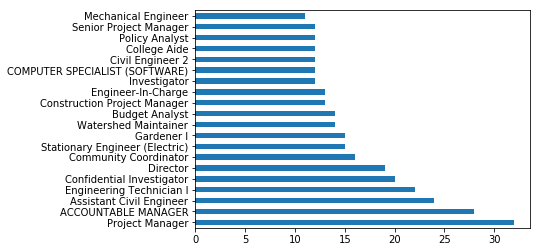

In [4]:
df['Business Title'].value_counts()[:20].plot(kind='barh')

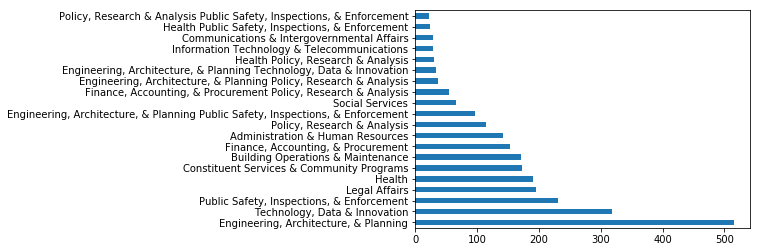

In [5]:
df['Job Category'].value_counts()[:20].plot(kind='barh')

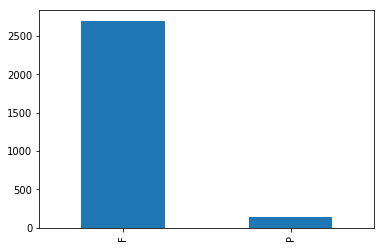

In [6]:
df['Full-Time/Part-Time indicator'].value_counts()[:20].plot(kind='bar')

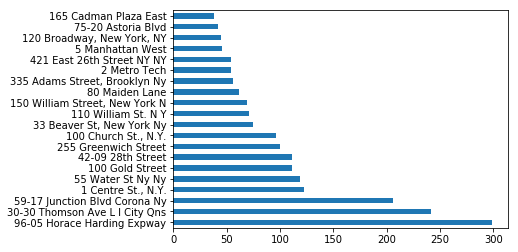

In [7]:
df['Work Location'].value_counts()[:20].plot(kind='barh') # Combine streets to neighborhoods.

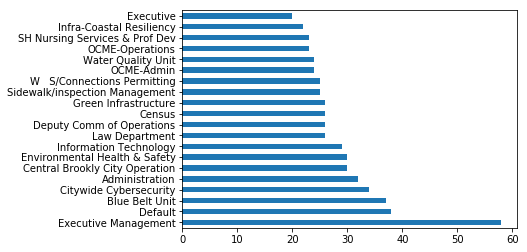

In [8]:
df['Division/Work Unit'].value_counts()[:20].plot(kind='barh')

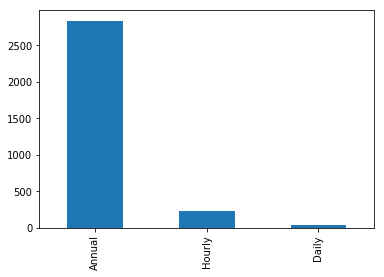

In [9]:
df['Salary Frequency'].value_counts()[:20].plot(kind='bar')

In [25]:
# assign 1 to annual freq in a new column
df.loc[df['Salary Frequency'] == 'Annual', 'SalaryFreqNumbers'] = 1
# assign 252 (roughly amount of business days in a year 12x21)
df.loc[df['Salary Frequency'] == 'Daily', 'SalaryFreqNumbers'] = 252
# assign 2016 (roughly amount of hours in a year 12x21x8)
df.loc[df['Salary Frequency'] == 'Hourly', 'SalaryFreqNumbers'] = 2016
df.groupby('Salary Frequency').apply(lambda df: df.sample(1))

,,Job ID,Agency,Posting Type,Business Title,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,SalaryFreqNumbers
Salary Frequency,,,,,,,,,,,,,
Annual,470,339479,DEPT OF ENVIRONMENT PROTECTION,External,Engineering Technician I,"Public Safety, Inspections, & Enforcement",F,36239.00,47016.00,Annual,96-05 Horace Harding Expway,Div of Field Op/Quality Assur,1.0
Daily,923,375197,DEPARTMENT OF SANITATION,Internal,Maintenance Worker,Building Operations & Maintenance,F,220.64,232.00,Daily,"East 91St St & East River, N Y",M T S E 91st St,252.0
Hourly,1148,380495,ADMIN TRIALS AND HEARINGS,Internal,Richard C. Failla OATH Law Clerk Fellowship,Legal Affairs,P,32.57,32.57,Hourly,"100 Church St., N.Y.",Trial Division,2016.0


In [27]:
df['Average Salary'] = ((df['Salary Range From'] + df['Salary Range To'])/2)*(df.SalaryFreqNumbers)
df.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Job ID,Agency,Posting Type,Business Title,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,SalaryFreqNumbers,Average Salary
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,Account Manager,NaN,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,1.0,53945.0
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",NaN,F,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,1.0,111377.0
2,132292,NYC HOUSING AUTHORITY,External,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,1.0,53244.0
3,132292,NYC HOUSING AUTHORITY,Internal,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,1.0,53244.0
4,133921,NYC HOUSING AUTHORITY,Internal,Temporary Painter,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,2016.0,70560.0
